# Python, Pandas, Numpy, and Scikit-Learn

In [0]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Loading and exploring the data with Pandas and Matplotlib

Our goal in this notebook will be to predict California housing prices given a number of features. This dataset comes pre-split into a training set and a test set, so we will need to load both.

In [2]:
df_train = pandas.read_csv('sample_data/california_housing_train.csv')
df_test = pandas.read_csv('sample_data/california_housing_test.csv')

# Inspect the first few elements of the dataframe
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Let's explore the data by plotting each of the features against the value that we're trying to predict: `median_house_value`

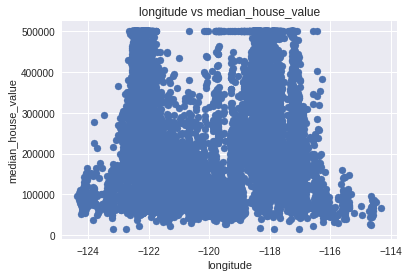

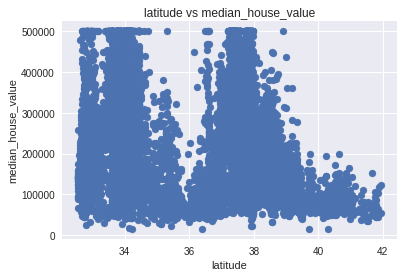

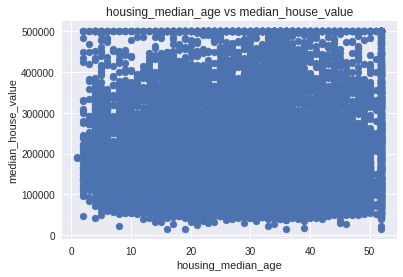

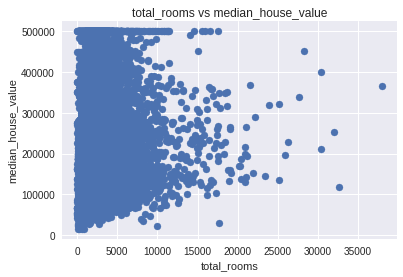

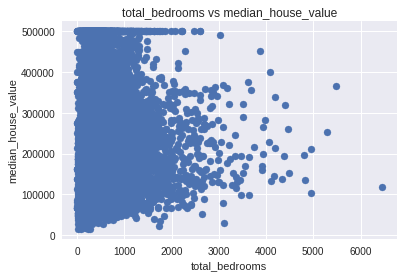

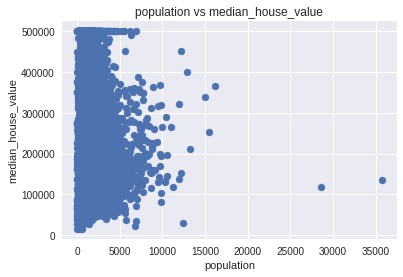

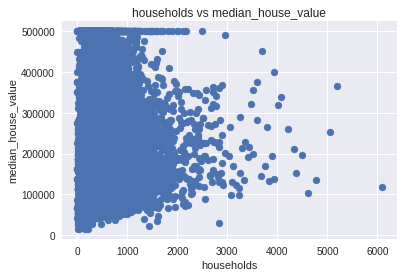

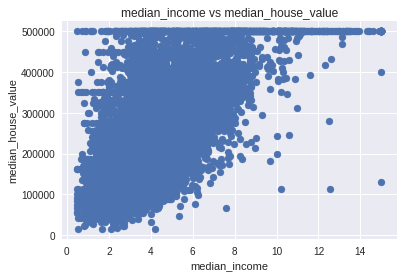

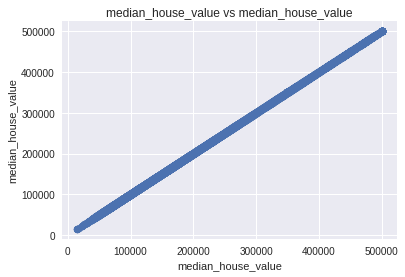

In [3]:
target = 'median_house_value'

for feat in df_train.columns:
    plt.scatter(df_train[feat], df_train[target])
    plt.title(feat + ' vs ' + target)
    plt.xlabel(feat)
    plt.ylabel(target)
    plt.show()

In [0]:
# for this example, we're only going to use one feature to make visualization easier
X = df_train[['median_income']].values
y = df_train['median_house_value'].values

X_test = df_test[['median_income']].values
y_test = df_test['median_house_value'].values

# but, we will add polynomial features
def transform(X, degree=1):
    normalized = (X.flatten() - X_train.mean()) / X_train.std()
    return np.vstack([normalized ** i for i in range(1, degree + 1)]).T

## Splitting up data, and setting up evaluation metrics

One basic technique for model selection is to split up the data into a training set and a validation set. We can train the model on the training set, and tune the model's hyperparameters to optimize the model's performance on the validation set.

In this example, we will be using [$R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination)as our evaluation metric. 

In [0]:
from sklearn.model_selection import train_test_split

# randomly split the dataset into a training and validation set
X_train, X_val, y_train, y_val = data_split = train_test_split(
    X, y, test_size=0.2, random_state=181
)

def evaluate_model(model, degree=1):
    print('  Training R^2:', model.score(transform(X_train, degree), y_train))
    print('Validation R^2:', model.score(transform(X_val, degree), y_val))
    print('      Test R^2:', model.score(transform(X_test, degree), y_test))

## Training a basic linear regression with sklearn

In [6]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

# fit a basic linear regression model to the trainign set
model = linear_model.LinearRegression()
model.fit(transform(X_train, degree=1), y_train)

# evaluate the model's R^2
evaluate_model(model, degree=1)

  Training R^2: 0.47419825220863826
Validation R^2: 0.49530756828852857
      Test R^2: 0.45213312787354076


## Training a Regularlized Linear Regression with Cross-Validation

Another common technique for model selection is K-Fold cross validation. As described in the handout PDF, it involves repeatedly selecting a large portion of the data set to train and using the remainder to evaluate validation set performance.

In this example, we will try to predict `median_house_value` using polynomial features of the `median_income`, and a random forest regression.

In [0]:
from sklearn.model_selection import KFold

def cross_validate(model_cls, model_params, degree, n_splits=4):
    model = model_cls(**model_params)
    
    # setting up K-Fold cross validation
    kf = KFold(n_splits, shuffle=True) # Try setting shuffle=False

    # keeping track of the average R^2 for these parameters
    avg_r2 = 0

    # setting up a grid of plots
    fig, axes = plt.subplots(1, n_splits)

    for i, (train_idx, val_idx) in enumerate(kf.split(X)):
        # fitting the model on a subset of the training data
        model.fit(transform(X[train_idx], degree), y[train_idx])

        # evaluating the model
        val_r2 = model.score(transform(X[val_idx], degree), y[val_idx])
        avg_r2 += val_r2 / n_splits

        # generating some sample predictions to make a plot
        grid_x = np.linspace(X.min(), X.max(), 200)
        preds = model.predict(transform(grid_x, degree))

        # plotting `median_income` vs the predicted `median_house_value`
        axes[i].set_title(f"Validation R^2: {val_r2:.3f}")
        axes[i].set_xlabel("median_income")
        axes[i].set_ylabel("median_house_value")   
        axes[i].scatter(X[val_idx, 0], y[val_idx])
        axes[i].scatter(grid_x, preds)

    # some stuff to make the plots look nicer
    fig.set_size_inches(28, 5)
    fig.subplots_adjust(hspace=0.3)
    plt.show()

    print('Average Validation R^2:', avg_r2)
    return avg_r2

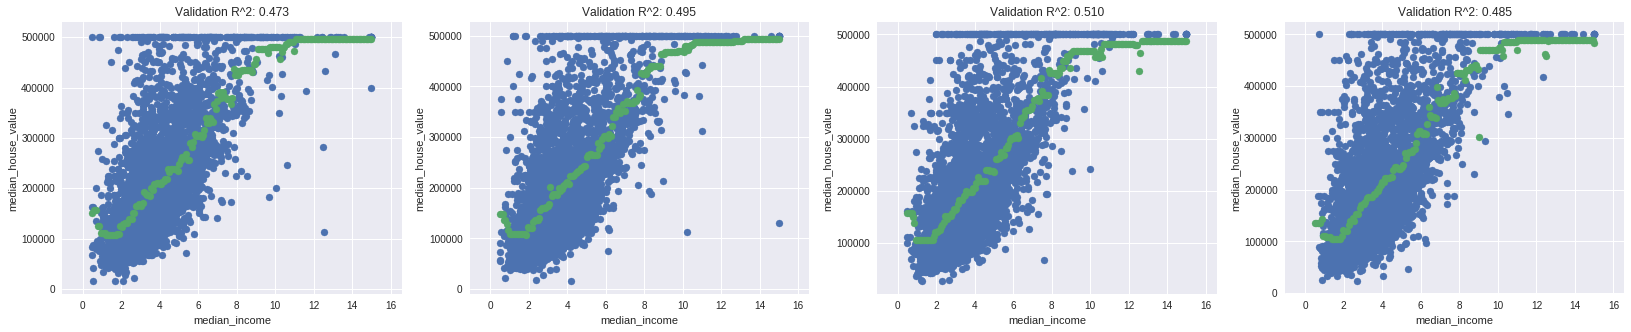

Average Validation R^2: 0.4905338319694352


0.4905338319694352

In [8]:
# try playing around with these parameters, or changing the model_cls
model_cls = RandomForestRegressor
model_params = {'n_estimators': 10, 'max_depth': 5}
degree = 5
n_splits = 4

cross_validate(model_cls, model_params, degree, n_splits)

We can also programatically try out a bunch of parameters and choose which one is best.

model_params = {'n_estimators': 1, 'max_depth': 20}
degree = 1


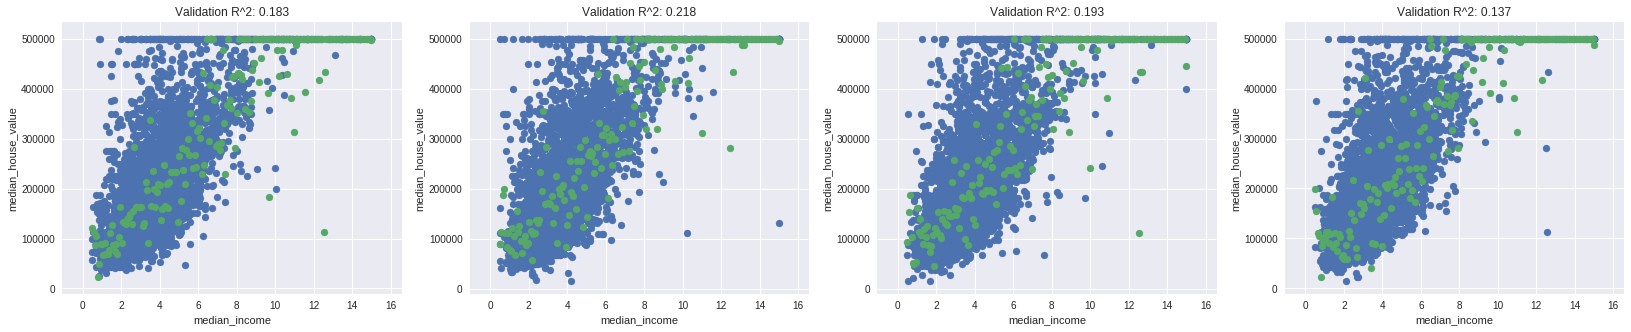

Average Validation R^2: 0.1828783458470484




model_params = {'n_estimators': 5, 'max_depth': 20}
degree = 1


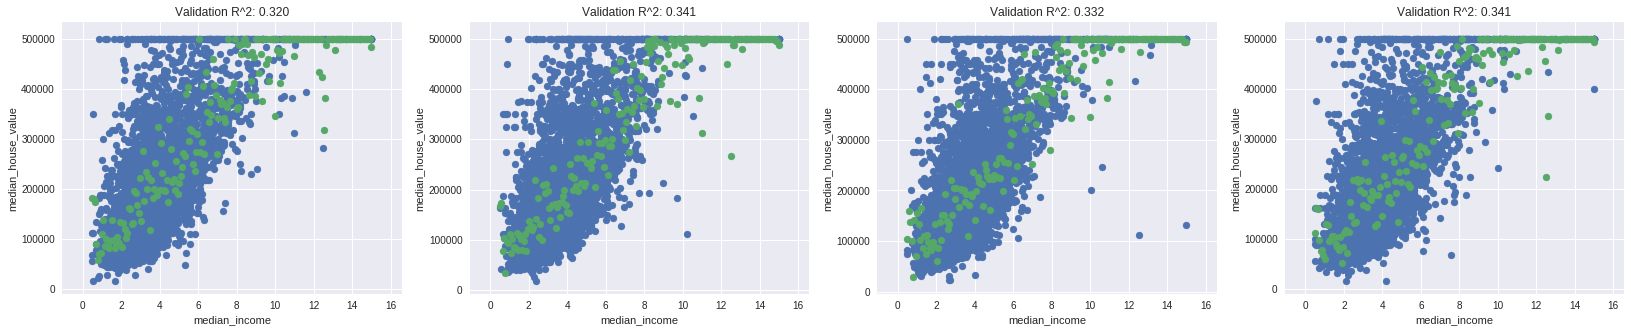

Average Validation R^2: 0.33325717974708663




model_params = {'n_estimators': 1, 'max_depth': 20}
degree = 4


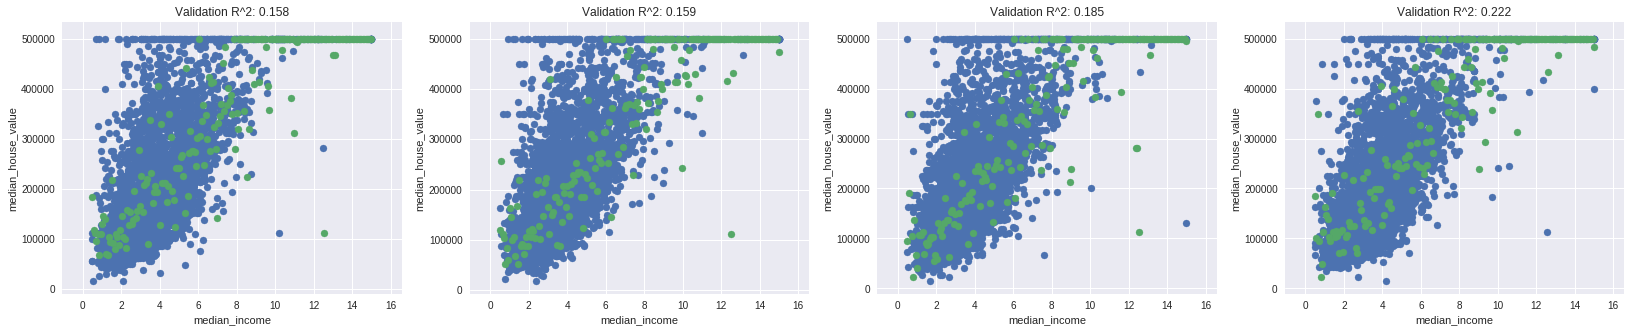

Average Validation R^2: 0.18088580936996723




model_params = {'n_estimators': 5, 'max_depth': 20}
degree = 4


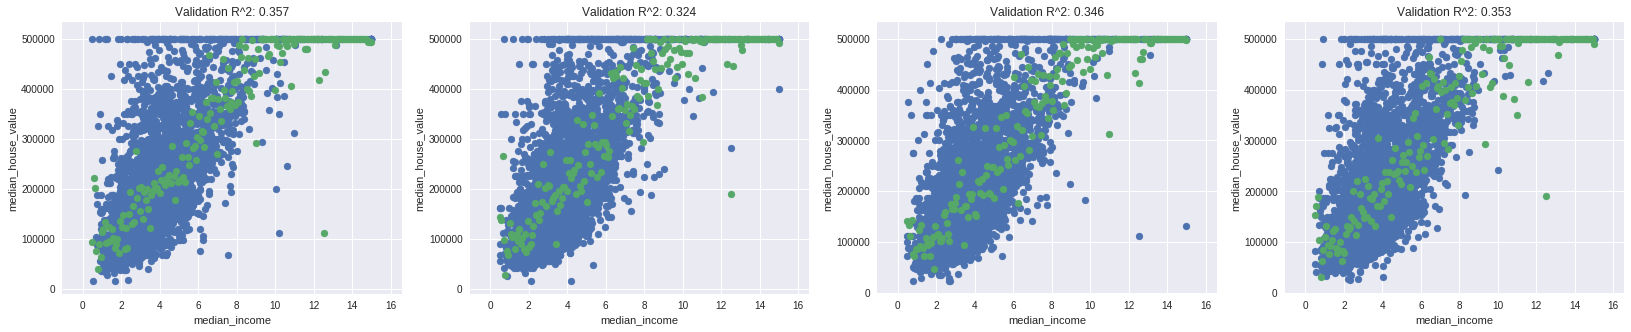

Average Validation R^2: 0.3449916119185889




Best degree: 4
Best model params: {'n_estimators': 5, 'max_depth': 20}
Best validation R^2: 0.3449916119185889


Best model evaluation
  Training R^2: 0.7070455748801397
Validation R^2: 0.3579625373857922
      Test R^2: 0.3294251367880826


In [9]:
# try out a lot of parameters and find the best ones
best_degree = None
best_model_params = None
best_val_r2 = 0
model_cls = RandomForestRegressor


for degree in [1, 4]:
    for n_estimators in [1, 5]:
        # setting up the model parameters dict
        model_params = {'n_estimators': n_estimators, 'max_depth': 20}

        # running cross validation for the model with the parameters
        print('model_params =', model_params)
        print('degree =', degree)
        val_r2 = cross_validate(model_cls, model_params, degree, n_splits)
        
        # updating the best parameters if the avg validation accuracy is higher
        if val_r2 > best_val_r2:
            best_val_r2 = val_r2
            best_degree = degree
            best_model_params = model_params
            
        print('\n\n\n')
        
print('Best degree:', best_degree) 
print('Best model params:', best_model_params) 
print('Best validation R^2:', best_val_r2)

# evaluating how the best model does on a standard train/test split
print('\n\nBest model evaluation')
best_model = model_cls(**best_model_params)
best_model.fit(transform(X_train, best_degree), y_train)
evaluate_model(best_model, best_degree)